# Kinematics

### Point

In [1]:
import numpy as np

class Point:
    def set_position(self, x,y,z):
        self.position = dict(x=x, y=y, z=z)

In [2]:
O = Point()
O.set_position(1,2,3)

print(O.position)

{'x': 1, 'y': 2, 'z': 3}


### Frame

In [3]:
X = np.array([1,0,0])
Y = np.array([0,1,0])
Z = np.array([0,0,1])

class Axis:
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
        self.vector = self.init_vector()
        
    def init_vector(self):
        return self.x*X + self.y*Y + self.z*Z

class Frame:
    def init_origin(self,x_,y_,z_):
        self.origin = Point()
        self.origin.set_position(x_,y_,z_)
    def init_axis(self, X_, Y_, Z_):
        self.axis = dict(x=Axis(1,2,3), y=Axis(1,2,3), z=Axis(1,2,3))

In [4]:
F = Frame()
F.init_origin(1,2,3)
print(F.origin.position)

F.init_axis(1,2,3)
print(F.axis['x'].vector)

{'x': 1, 'y': 2, 'z': 3}
[1 2 3]


### Rotation matrix

3x3 matrix whose column vectors are orthonormal frame.
It is orthogonal matrix (xTy = 0, xTx = 1, RTR = I, RT = R-1)

##### elementary rotations

Rotation around one of the coordinate axes. Positive if counterclockwise

In [30]:
class RotationMatrix:
    def __init__(self, alpha, beta, gamma):
        # around which axis
        self.rot_X = self.make_X_rot(alpha)
        self.rot_Y = self.make_Y_rot(beta)
        self.rot_Z = self.make_Z_rot(gamma)
        
    def make_X_rot(self, gamma):
        x_rotation = [1, 0, 0]
        y_rotation = [0, np.cos(gamma), np.sin(gamma)]
        z_rotation = [0, -np.sin(gamma), np.cos(gamma)]
        return np.array((x_rotation, y_rotation, z_rotation)).T
    
    def make_Y_rot(self, beta):
        x_rotation = [np.cos(beta), 0, -np.sin(beta)]
        y_rotation = [0, 1, 0]
        z_rotation = [np.sin(beta), 0, np.cos(beta)]
        return np.array((x_rotation, y_rotation, z_rotation)).T
    
    def make_Z_rot(self, alpha):
        x_rotation = [np.cos(alpha), np.sin(alpha), 0]
        y_rotation = [-np.sin(alpha), np.cos(alpha), 0]
        z_rotation = [0, 0, 1]
        return np.array((x_rotation, y_rotation, z_rotation)).T

In [37]:
rot = RotationMatrix(0.2,0.5,1)
print('Rotation around X of {}' .format(0.2), '\n', rot.rot_X, '\n')
print('Rotation around Y of {}' .format(0.5), '\n', rot.rot_Y, '\n')
print('Rotation around Z of {}' .format(0.1), '\n', rot.rot_Z)

Rotation around X of 0.2 
 [[ 1.          0.          0.        ]
 [ 0.          0.98006658 -0.19866933]
 [ 0.          0.19866933  0.98006658]] 

Rotation around Y of 0.5 
 [[ 0.87758256  0.          0.47942554]
 [ 0.          1.          0.        ]
 [-0.47942554  0.          0.87758256]] 

Rotation around Z of 0.1 
 [[ 0.54030231 -0.84147098  0.        ]
 [ 0.84147098  0.54030231  0.        ]
 [ 0.          0.          1.        ]]


### Exercise 1

In [39]:
import matplotlib.pyplot as plt

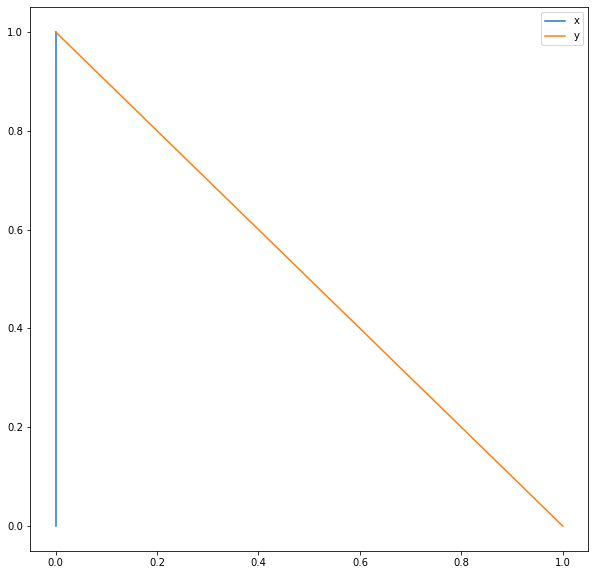

In [58]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot([0,0],[0,1], label='x')
ax.plot([1,0],[0,1], label='y')
ax.legend()
plt.show()